# Bank Customer Churn - Exploratory Data Analysis

This notebook aims to present the initial data analysis over the bank customer churn dataset.  It contains information on bank customers who either left the bank or continue to be a customer, with following attributes:

- Customer ID: A unique identifier for each customer
- Surname: The customer's surname or last name
- Credit Score: A numerical value representing the customer's credit score
- Geography: The country where the customer resides (France, Spain or Germany)
- Gender: The customer's gender (Male or Female)
- Age: The customer's age.
- Tenure: The number of years the customer has been with the bank
- Balance: The customer's account balance
- NumOfProducts: The number of bank products the customer uses (e.g., savings account, credit card)
- HasCrCard: Whether the customer has a credit card (1 = yes, 0 = no)
- IsActiveMember: Whether the customer is an active member (1 = yes, 0 = no)
- EstimatedSalary: The estimated salary of the customer
- Exited: Whether the customer has churned (1 = yes, 0 = no) 

The target variable is the 'Exited' feature. With this is mind, let's go to the analysis itself.

In [24]:
import matplotlib.pyplot as plt
from scipy.stats import zscore

import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv

In [2]:
sns.set_style('darkgrid')

In [5]:
data_path = '../data/training/raw/Abandono_clientes.csv'
df = pd.read_csv(data_path)

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Statistical analysis

Here we dive into the statistical measures of the dataset - if it contains missing values, numerical variables and its statistics, outlier detection, and any other information that may be obtained by using mathematical techniques.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
num_cols = [col for col in df.columns if df[col].dtype != object]
num_cols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [9]:
binary_cols = [col for col in num_cols if len(df[col].unique()) == 2]
binary_cols

['HasCrCard', 'IsActiveMember', 'Exited']

In [10]:
df_stats = df[num_cols].describe()
df_stats

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


At first glance, this data seems fine. By checking the statistical measures one can picture the average customer of this bank:
- around 40s
- Credit Score around 650
- Tenure around 5 years
- Great chance of having credit card and using at least two products of the bank
- Has salary around 100k and a balance that fluctuates around 70k.

Data don't seems to have outliers, even though a deeper analysis may be useful still. It is good to check if we got features with high variance.

In [38]:
variance_mean_ratio = df_stats.T['std'] / df_stats.T['mean']
variance_mean_ratio

RowNumber          0.577321
CustomerId         0.004585
CreditScore        0.148577
Age                0.269458
Tenure             0.576958
Balance            0.815803
NumOfProducts      0.380117
HasCrCard          0.646124
IsActiveMember     0.970291
EstimatedSalary    0.574586
Exited             1.977264
dtype: float64

Of the non-binary cols, Balance seems to have a relatively high variability in comparison to other columns. CreditScore and Age are low, and EstimatedSalary is the middle. Overall, it is possible to see the data has as average variance and may not bring problems due to highly spread data.

We can check other combinations for customer profilling, like:
- Group by Number of Products and check whats the average tenure related to each product.
- Group by Credit Score bins (that can be a possible new feature) and check the average age of each score
- Group by customer exit and observe the features' statistics 

In [23]:
df.groupby(['NumOfProducts'])[['Tenure']].mean()

,Tenure
NumOfProducts,
1,4.974626
2,5.051852
3,5.003759
4,5.300000


In [28]:
df_copy = df.copy()
score_bins = [300, 580, 670, 740, 800, 870]
score_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']

df_copy['Credit_Score_bins'] = pd.cut(df_copy['CreditScore'], bins=score_bins, labels=score_labels, right=False)
   
df_copy.groupby('Credit_Score_bins')[['Age','Balance']].mean()

/var/folders/kz/5j2pxpc51t11sgnw8bstnz380000gn/T/ipykernel_9025/1131598309.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy.groupby('Credit_Score_bins')[['Age','Balance']].mean()


,Age,Balance
Credit_Score_bins,,
Poor,38.799746,75900.471952
Fair,39.093966,76919.460144
Good,38.834432,74978.995400
Very Good,38.815359,79162.343407
Excellent,39.009160,76976.407985


In [33]:
df_copy.groupby(['Exited', 'Credit_Score_bins'])['CustomerId'].count().loc[1] # Check only exited cases

/var/folders/kz/5j2pxpc51t11sgnw8bstnz380000gn/T/ipykernel_9025/2133131588.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_copy.groupby(['Exited', 'Credit_Score_bins'])['CustomerId'].count().loc[1]


Credit_Score_bins
Poor         520
Fair         685
Good         452
Very Good    252
Excellent    128
Name: CustomerId, dtype: int64

In [35]:
df.groupby(['Exited', 'NumOfProducts'])['CustomerId'].count()

Exited  NumOfProducts
0       1                3675
        2                4242
        3                  46
1       1                1409
        2                 348
        3                 220
        4                  60
Name: CustomerId, dtype: int64

In [39]:
df.groupby(['Exited', 'Gender'])['CustomerId'].count()

Exited  Gender
0       Female    3404
        Male      4559
1       Female    1139
        Male       898
Name: CustomerId, dtype: int64

In [37]:
df.groupby(['Exited'])[['Age', 'Balance', 'Tenure']].mean()

,Age,Balance,Tenure
Exited,,,
0,37.408389,72745.296779,5.033279
1,44.837997,91108.539337,4.932744


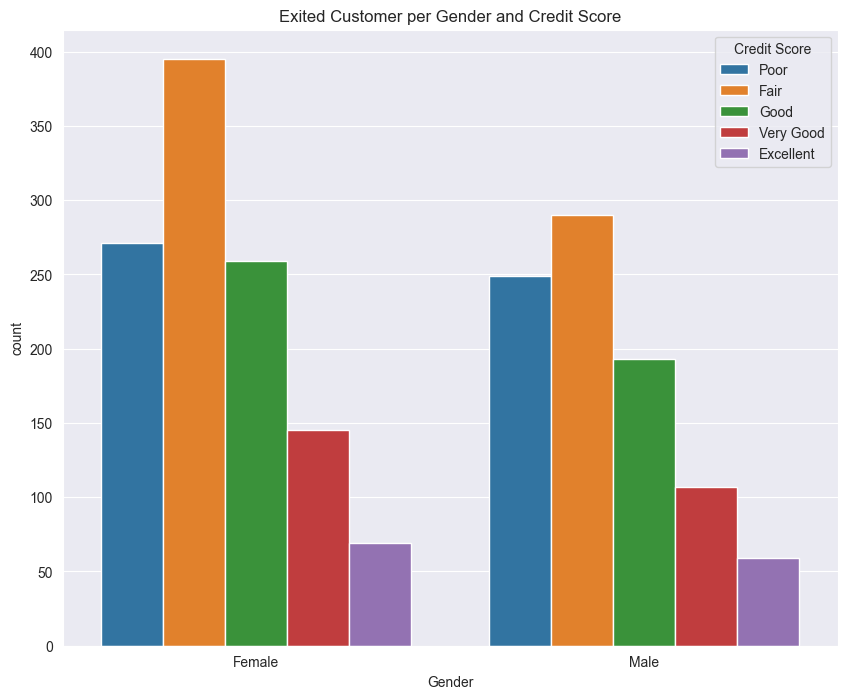

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_copy[df_copy.Exited == 1], x='Gender', hue='Credit_Score_bins')
plt.title('Exited Customer per Gender and Credit Score')
plt.legend(title='Credit Score')

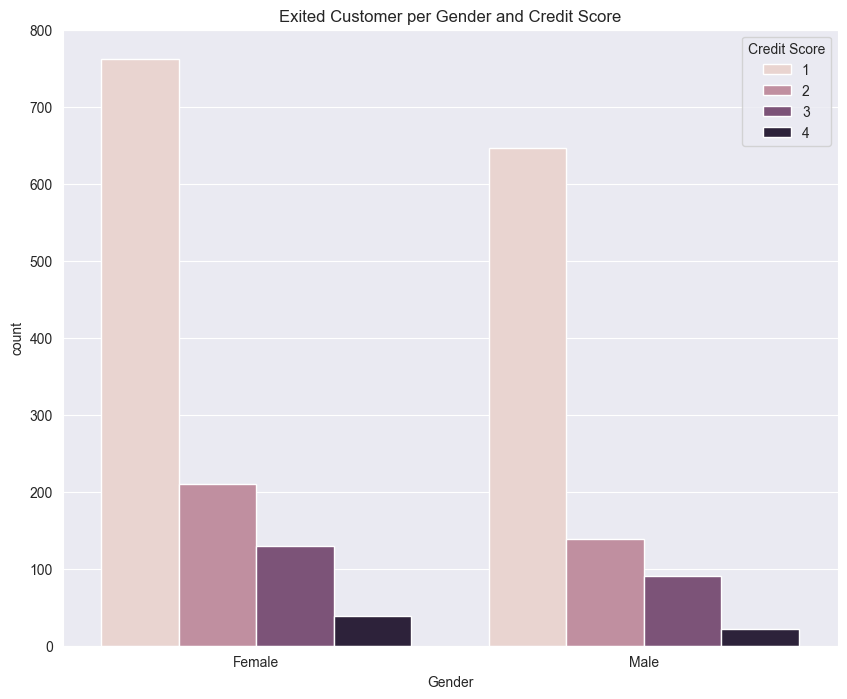

In [61]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_copy[df_copy.Exited == 1], x='Gender', hue='NumOfProducts')
plt.title('Exited Customer per Gender and Credit Score')
plt.legend(title='Credit Score')

Text(0.5, 1.0, 'Female Exited Customers Age distribution per Credit Score')

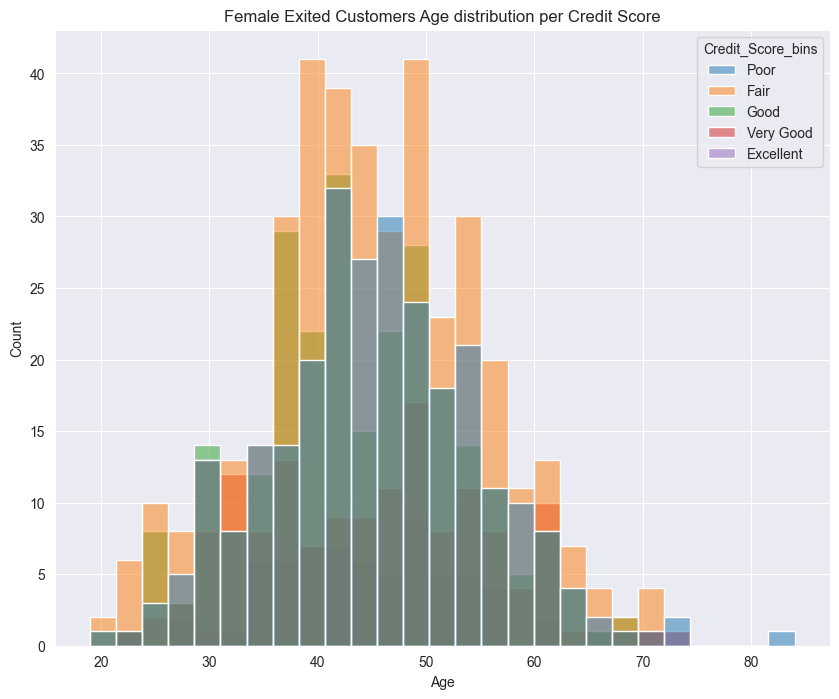

In [60]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df_copy[(df_copy.Exited == 1) & (df_copy.Gender == 'Female')], x='Age', hue='Credit_Score_bins')
plt.title('Female Exited Customers Age distribution per Credit Score')

By this analysis it was possible to see that most part of the data is well distributed since all averages per category getting close to the global averages. Still, regarding the exited customers, one can say that female customers with fair credit score and fewer products may have a higher chance to churn, so its a profile to be aware of.

Just in case, its good to carry a Outlier detection analysis.


In [40]:
# Outlier detection with Z-Score
cols_to_analysis = ['CreditScore','Age','Balance','EstimatedSalary']
z_scores = pd.DataFrame(zscore(df[cols_to_analysis]),columns=cols_to_analysis)
z_scores

,CreditScore,Age,Balance,EstimatedSalary
0,-0.326221,0.293517,-1.225848,0.021886
1,-0.440036,0.198164,0.117350,0.216534
2,-1.536794,0.293517,1.333053,0.240687
3,0.501521,0.007457,-1.225848,-0.108918
4,2.063884,0.388871,0.785728,-0.365276
...,...,...,...,...
9995,1.246488,0.007457,-1.225848,-0.066419
9996,-1.391939,-0.373958,-0.306379,0.027988
9997,0.604988,-0.278604,-1.225848,-1.008643
9998,1.256835,0.293517,-0.022608,-0.125231


In [51]:
outliers = (z_scores.abs() > 3.0)
df['has_outliers'] = outliers.any(axis=1)
df['outlier_col'] = outliers.apply(lambda row: ', '.join(row.index[row]), axis=1).replace('',None)

In [53]:
df[df['has_outliers']].outlier_col.value_counts()

outlier_col
Age            133
CreditScore      8
Name: count, dtype: int64

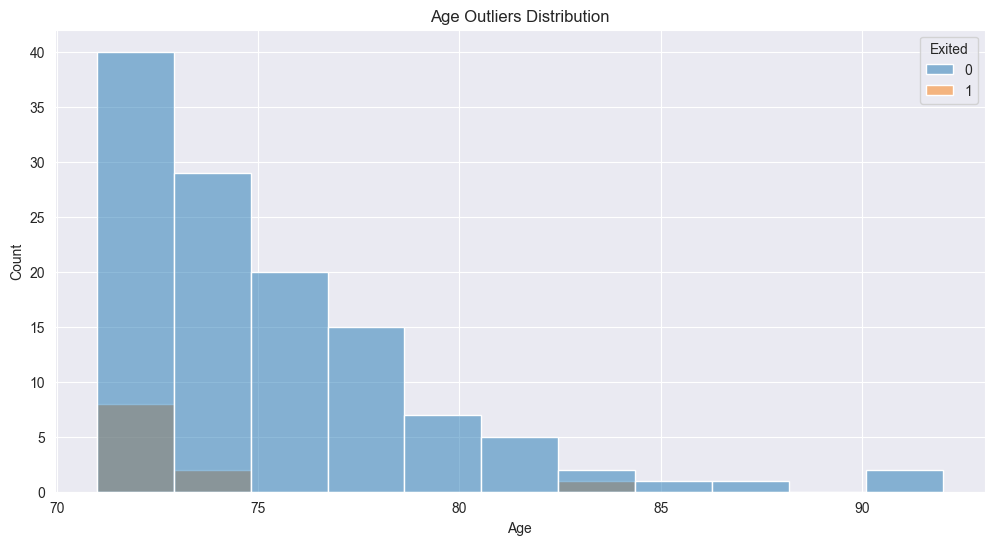

In [71]:
plt.figure(figsize=(12,6))
sns.histplot(data=df[(df['has_outliers']) & (df['outlier_col']=='Age')], x='Age', hue='Exited')
plt.title('Age Outliers Distribution')
plt.show()

In [54]:
df[(df['has_outliers']) & (df['outlier_col']=='CreditScore')]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,has_outliers,outlier_col
1405,1406,15612494,Panicucci,359,France,Female,44,6,128747.69,1,1,0,146955.71,1,True,CreditScore
1631,1632,15685372,Azubuike,350,Spain,Male,54,1,152677.48,1,1,1,191973.49,1,True,CreditScore
1838,1839,15758813,Campbell,350,Germany,Male,39,0,109733.20,2,0,0,123602.11,1,True,CreditScore
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8,143542.36,3,1,0,141959.11,1,True,CreditScore
2473,2474,15679249,Chou,351,Germany,Female,57,4,163146.46,1,1,0,169621.69,1,True,CreditScore
8723,8724,15803202,Onyekachi,350,France,Male,51,10,0.00,1,1,1,125823.79,1,True,CreditScore
8762,8763,15765173,Lin,350,France,Female,60,3,0.00,1,0,0,113796.15,1,True,CreditScore
9624,9625,15668309,Maslow,350,France,Female,40,0,111098.85,1,1,1,172321.21,1,True,CreditScore


As it seems, only Age and CreditScore got possible outliers caught by the Z-Score approach. 

Checking in detail, it seems the data is coherent with reality, and getting rid of it could do more harm to the already unbalanced situation of the target variable, as it seems to provide information about it.

At last, let's do a overall visualization with a automated library that I found very useful: sweetviz

## General Visualization

In [6]:
report = sv.analyze([df, 'train'], target_feat='Exited')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



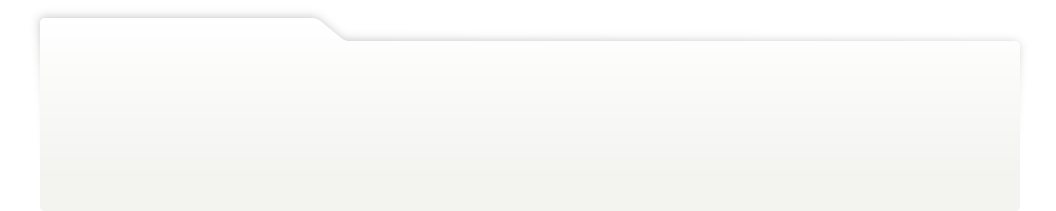
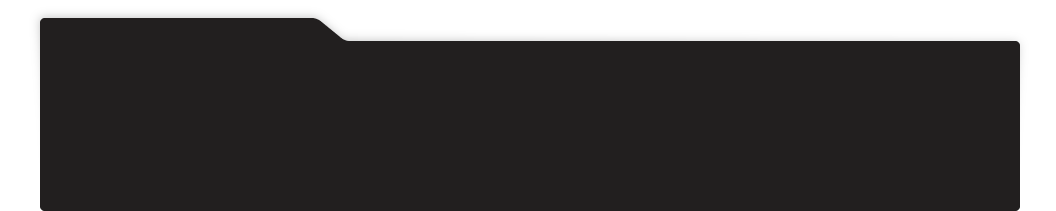
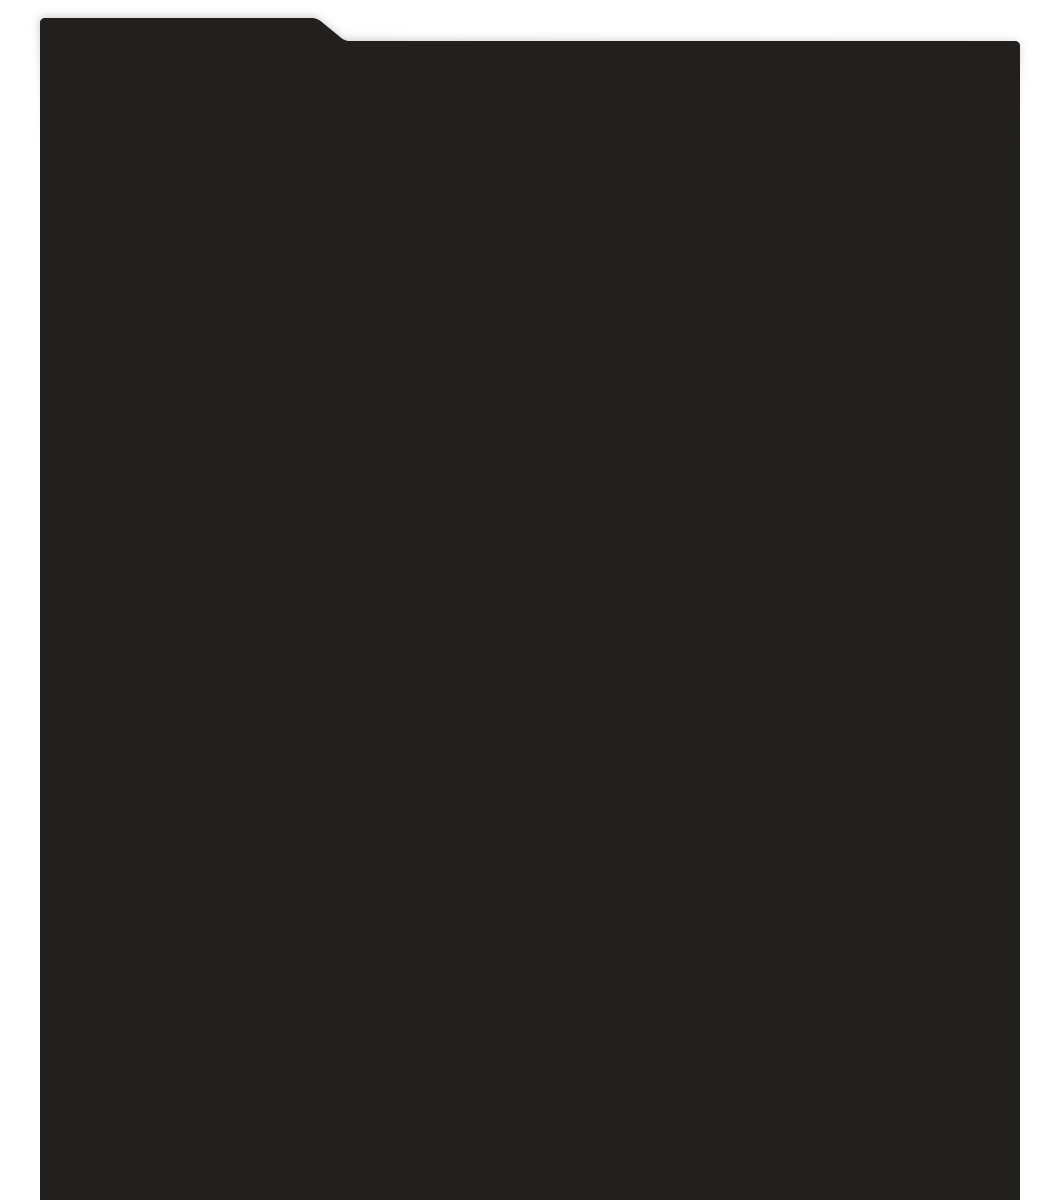
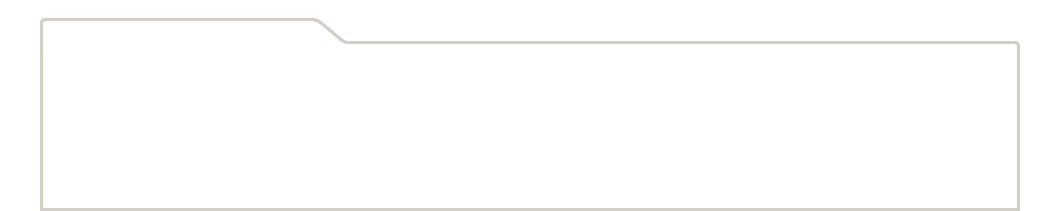
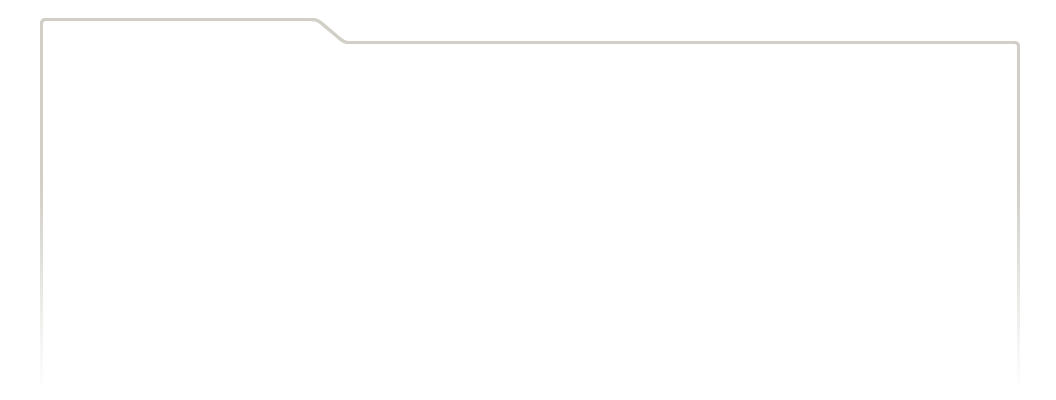
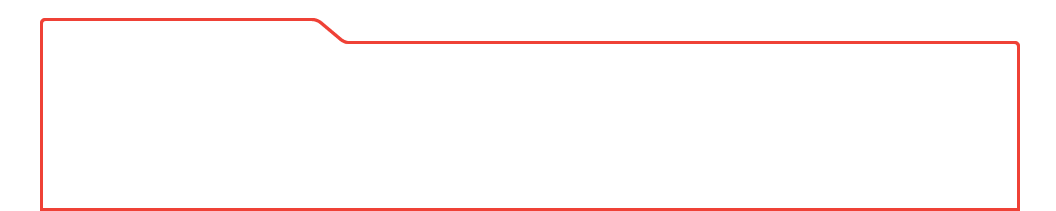
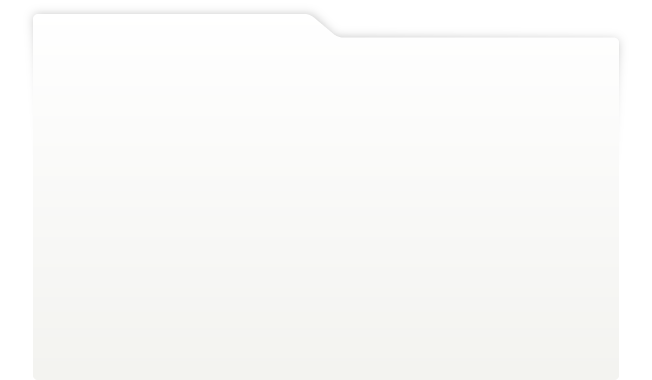
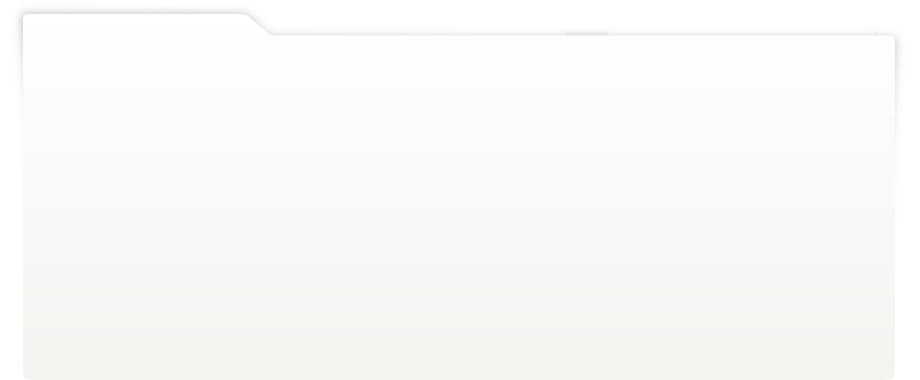
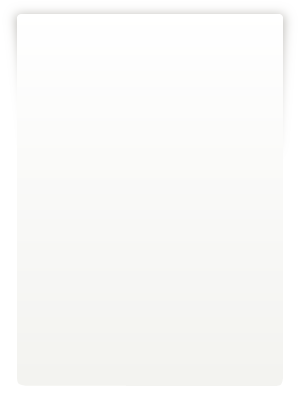
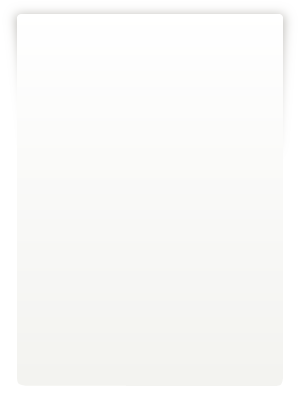
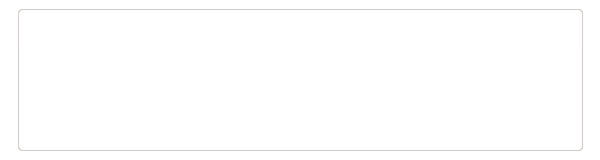
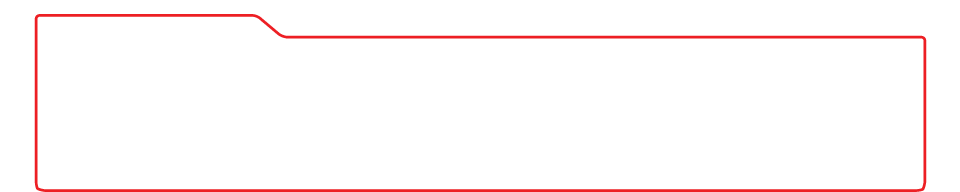
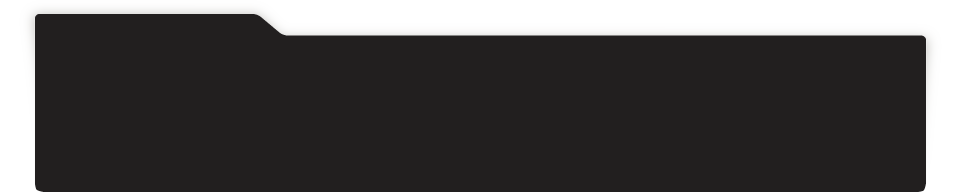
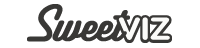
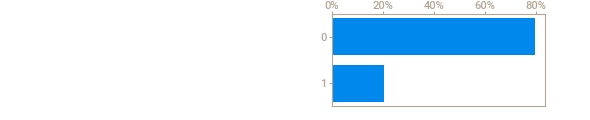
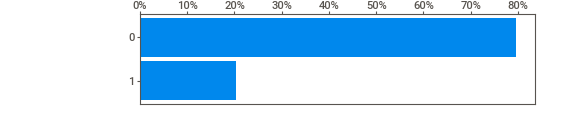
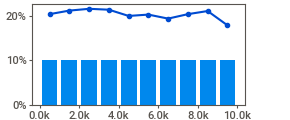
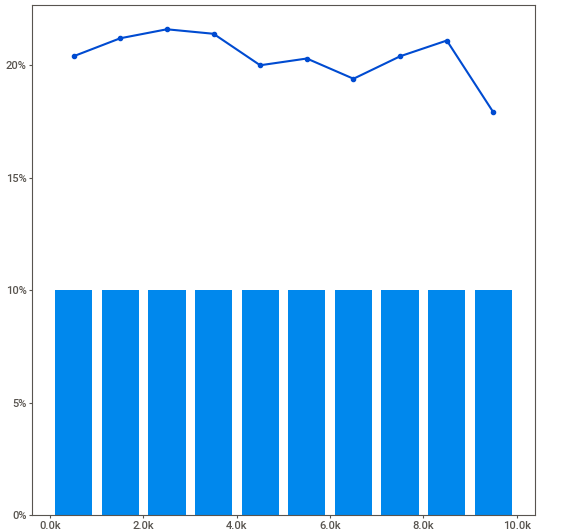
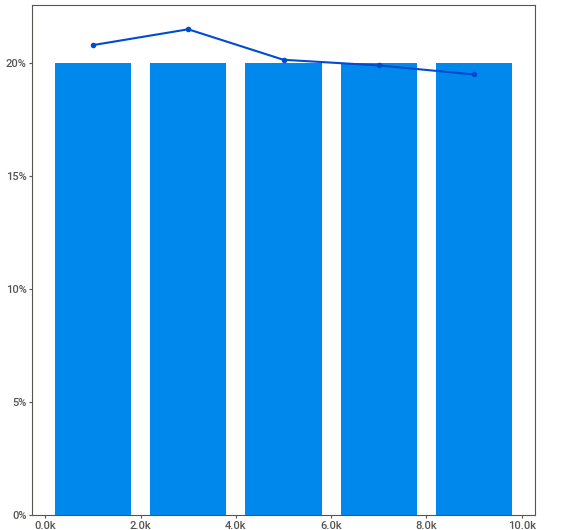
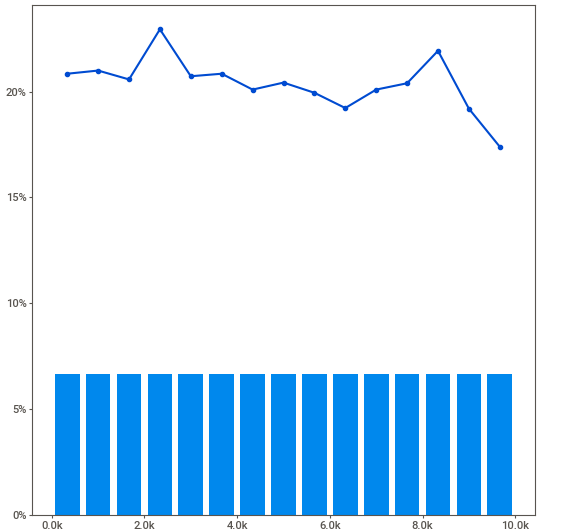
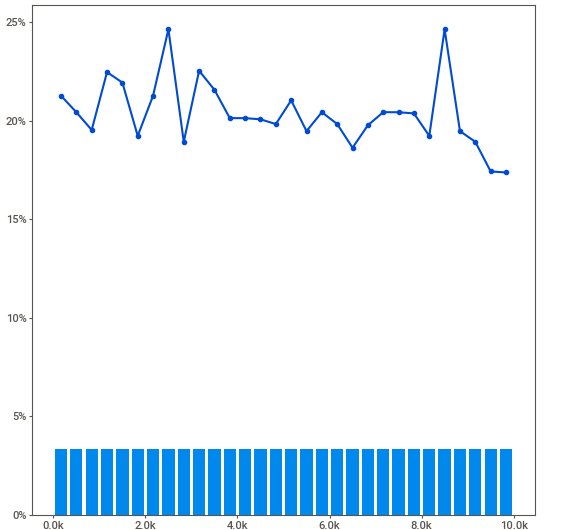
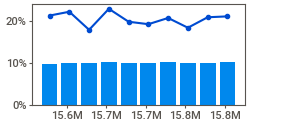
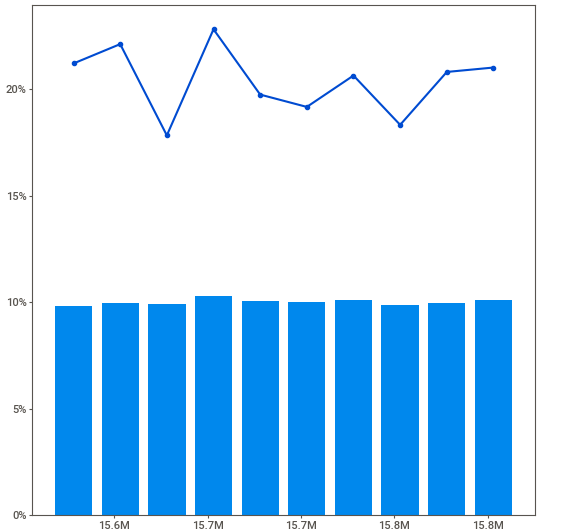
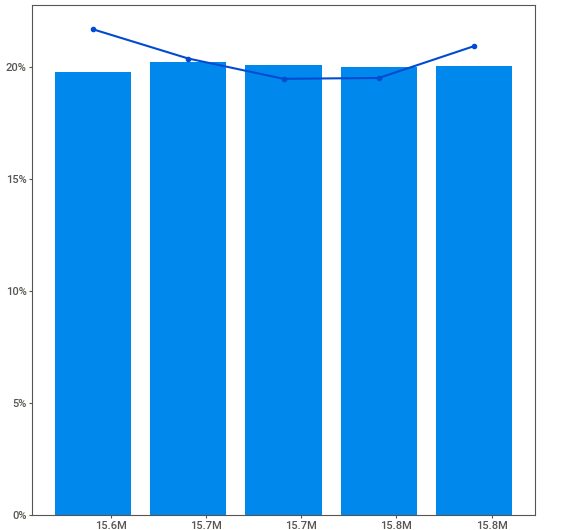
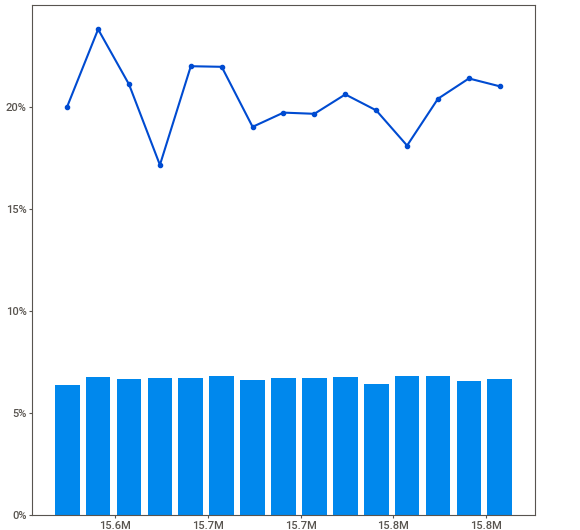
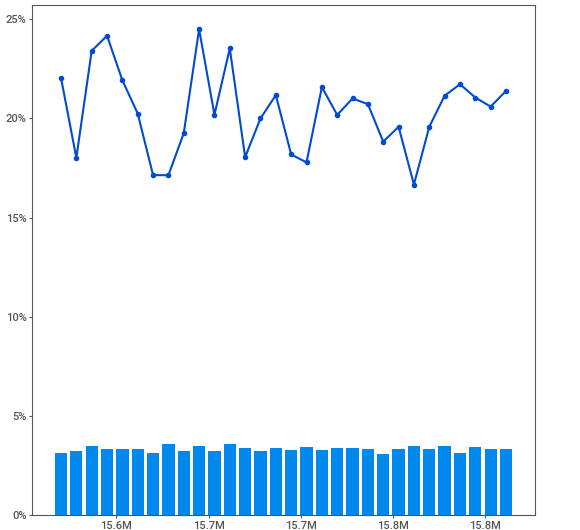
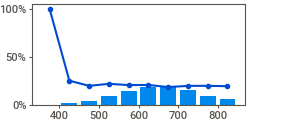
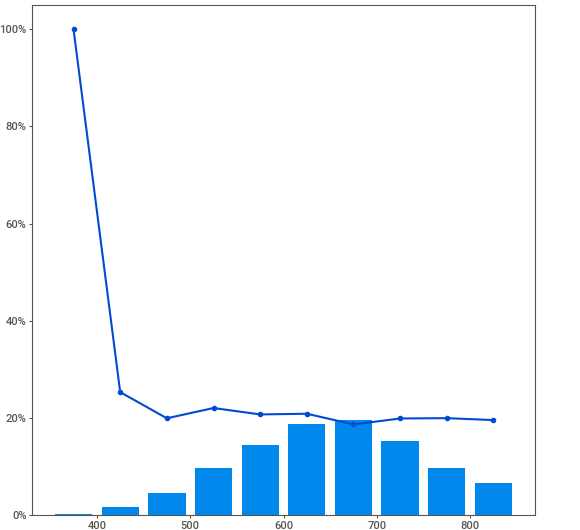
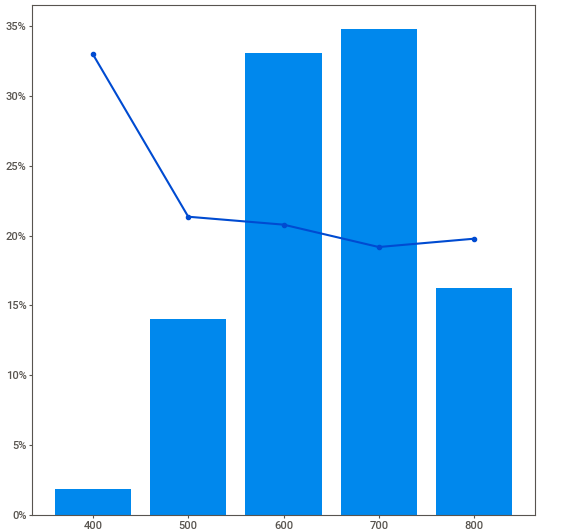
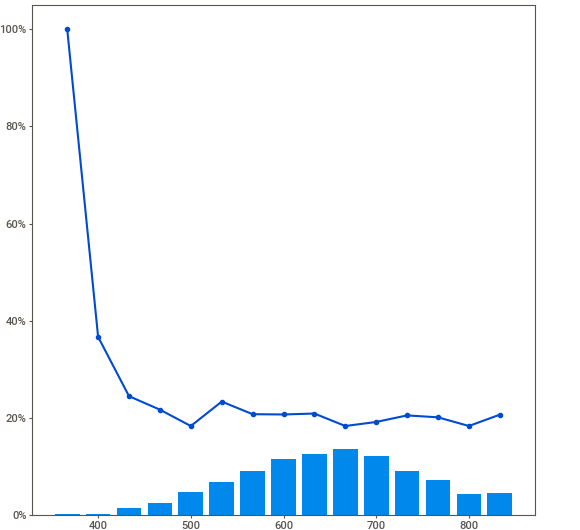
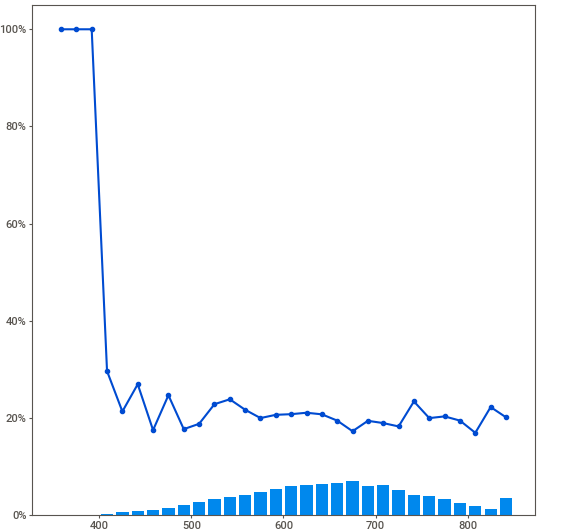
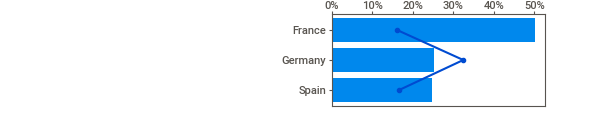
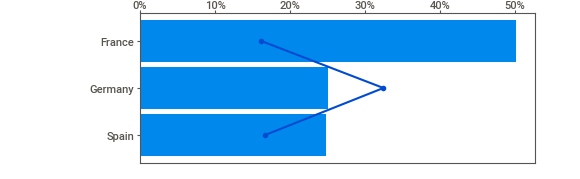
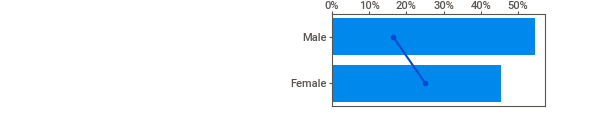
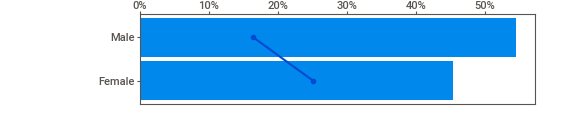
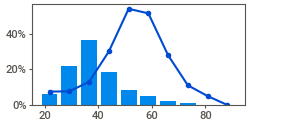
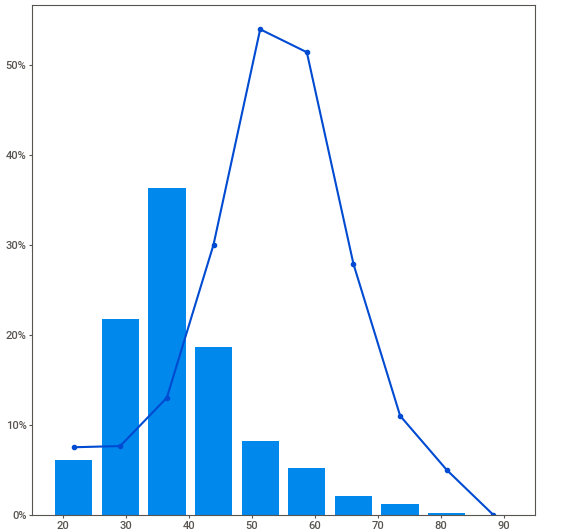
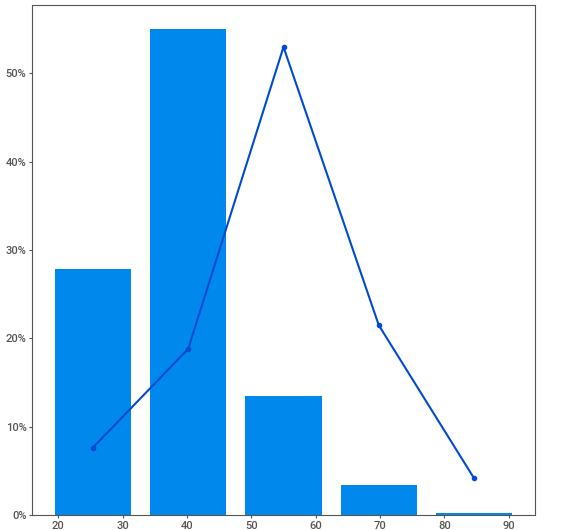
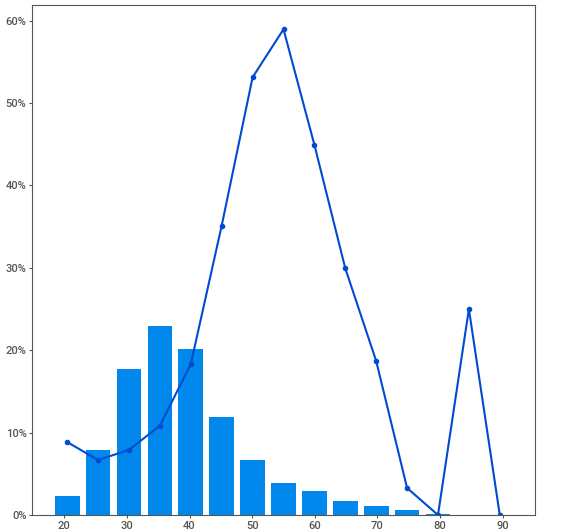
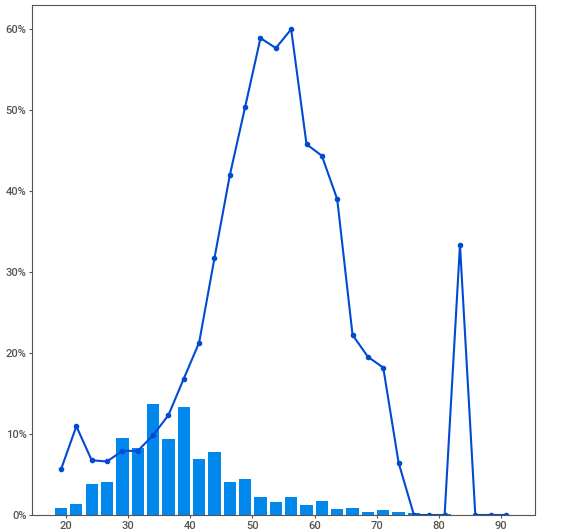
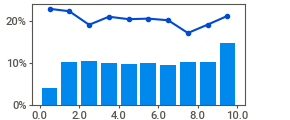
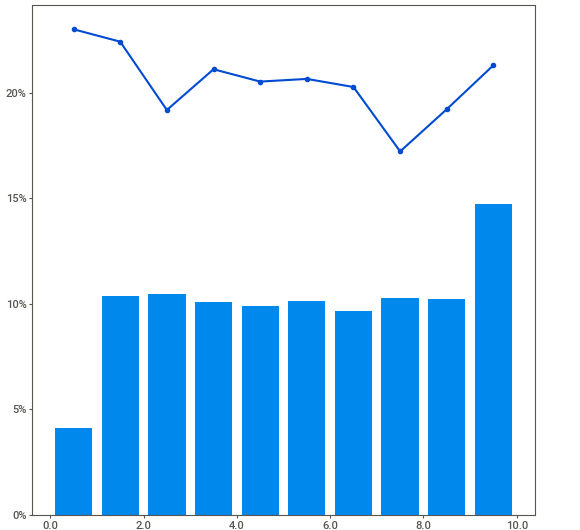
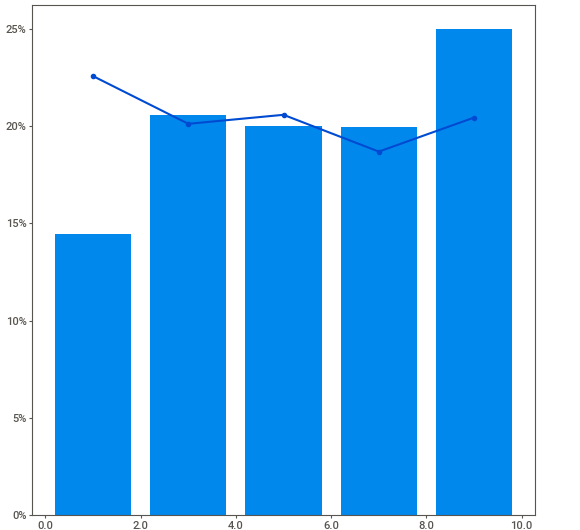
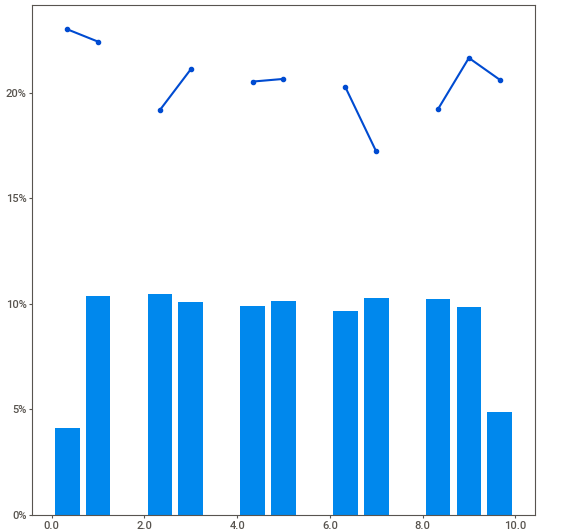
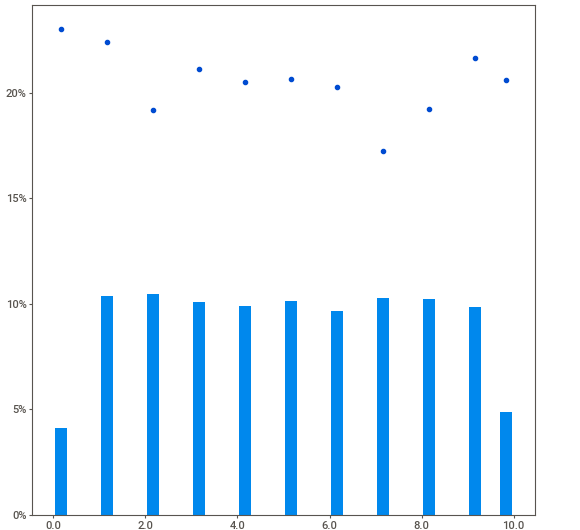
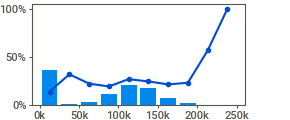
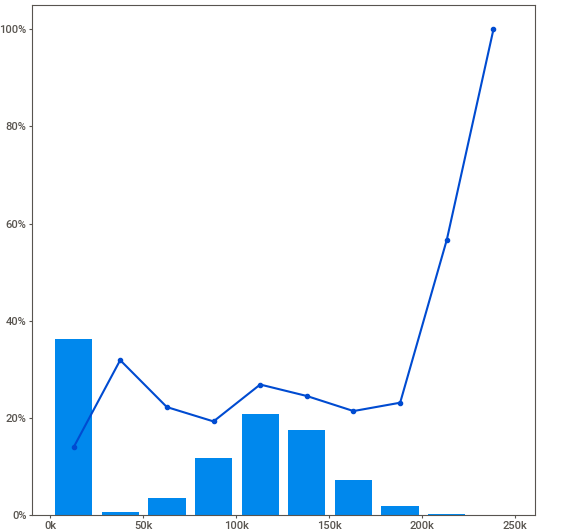
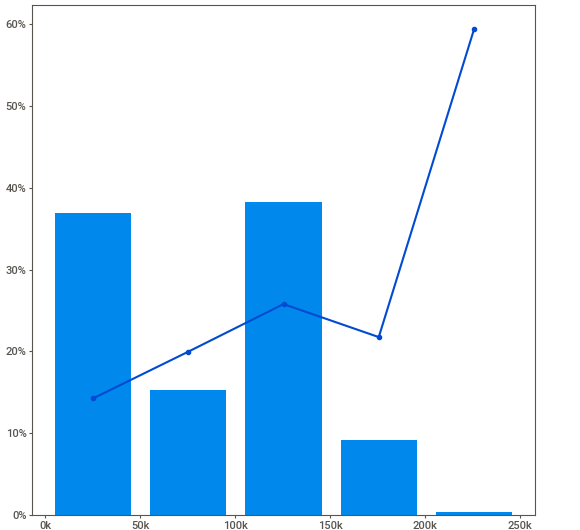
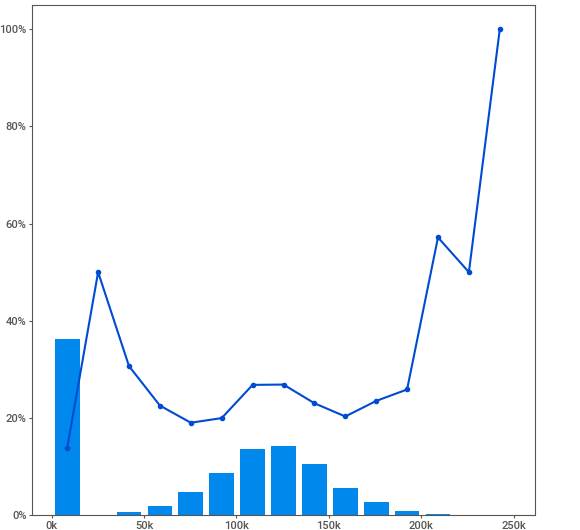
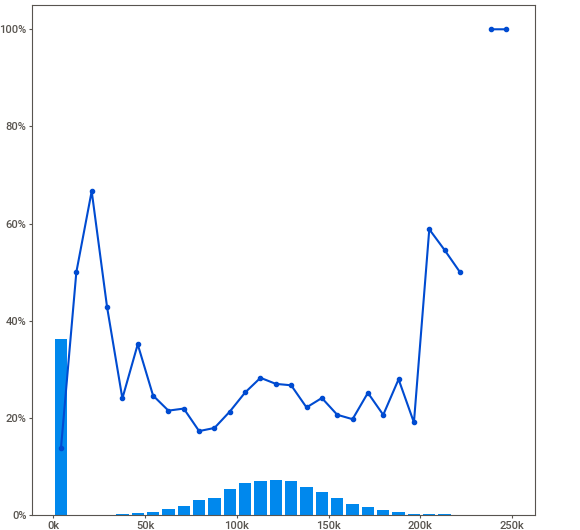
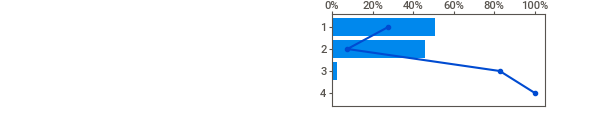
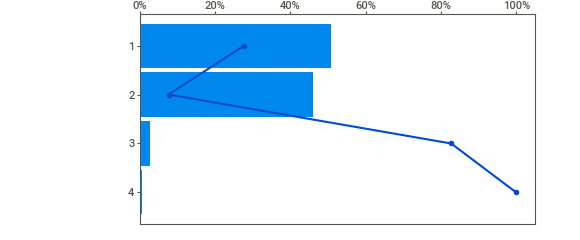
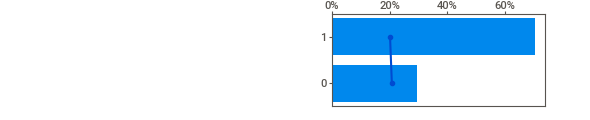
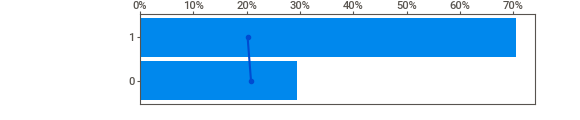
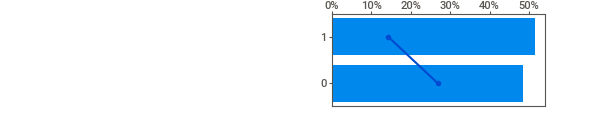
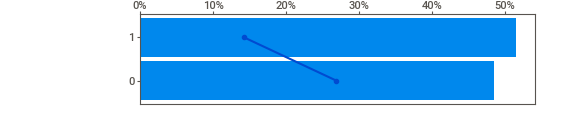
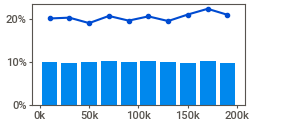
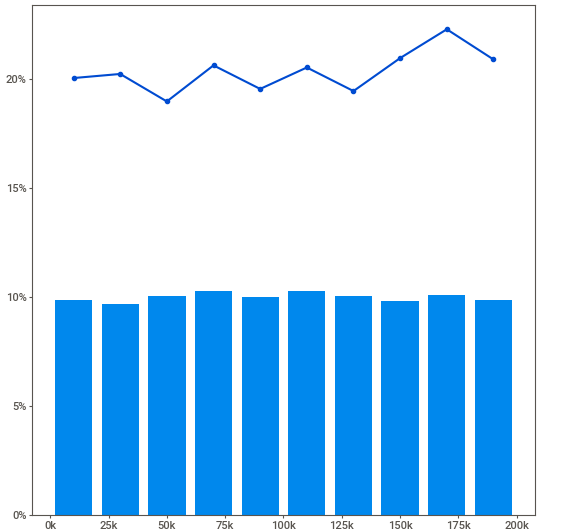
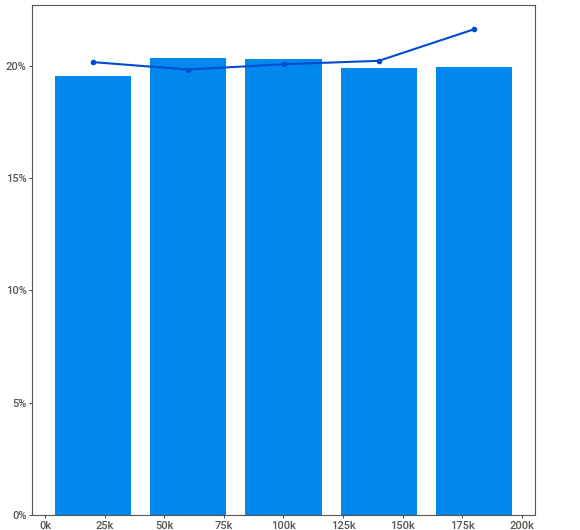
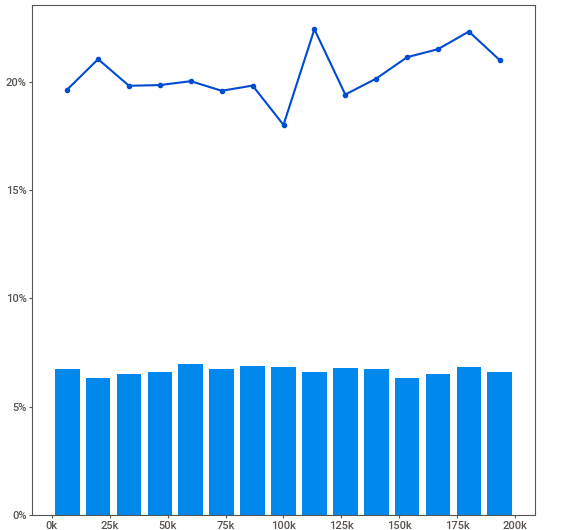
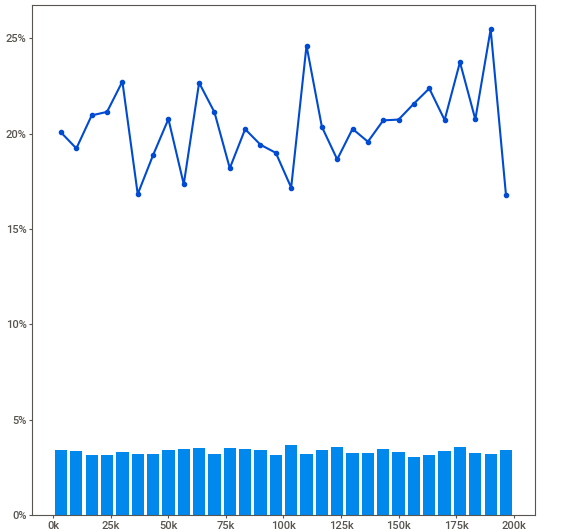
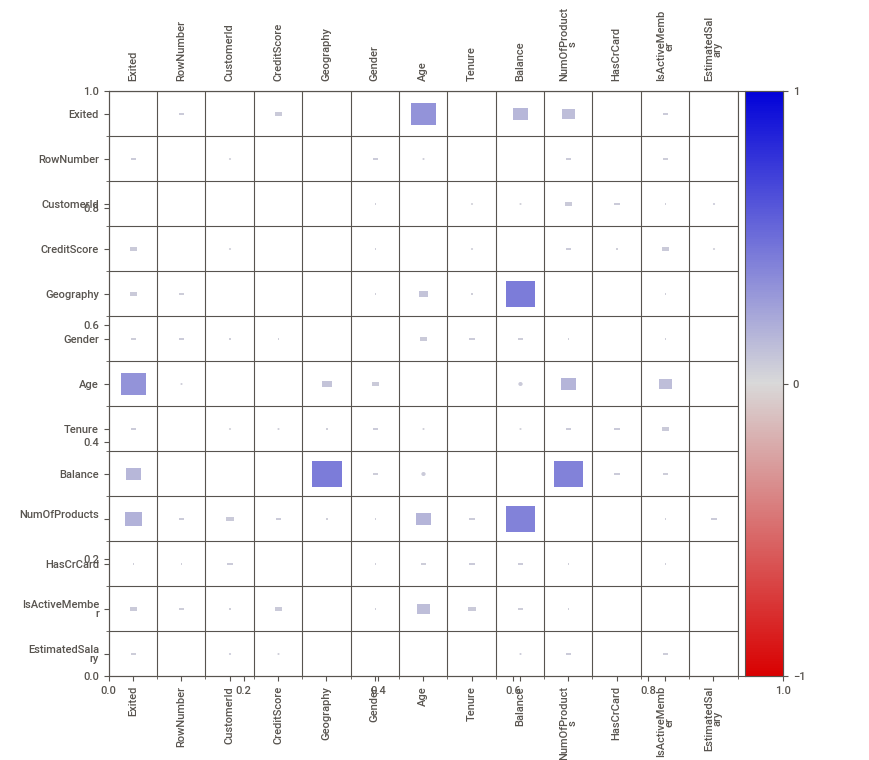
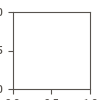

In [7]:
report.show_notebook()

By analyzing the information provided by the report a few insights can be obtained.

### Features
- Very few symmetrical numerical correlations. 
- The target variable is very unbalanced
- Age, Balance, and NumOfProducts seems to give information on the target variable
- Balance seems to have some categorical association with Geography and NumOfProducts
- Big part of the clients are from France, but all of them are into the european territory
- Of the non-binary numerical variables, Age and Balance are the ones that seems to follow a somewhat normal distribution.
- IsActiveMember is a confuse feature: what active means here? Account with high movement?

With this in hands, we can think about the next step on creating features that may improve the model generalization.

### Possible Feature Engineering
- Since we have the Salary, relate the income with Balance, Age, etc.
- Considering Tenure is the time the customer is with the bank, it can be related to features like NumOfProducts, isActiveMember.
- If IsActiveMember reffers to active account movement, relate the account balance with being an active member.
- Group numerical features into categorical features: Age, CreditScore, Tenure.



Now going to the next step: **data processing and model selection**.